# Principal Component Analysis

## 1. Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display
from sklearn.decomposition import PCA

## 2. Data

In [2]:
# Generate initial points (Gaussian, centered around 0,0)
np.random.seed(3347)
n = 100
x = 1*np.random.normal(size=n)
y = 2*np.random.normal(size=n)
X0 = np.vstack((x, y)).T

# Rotate points by 60 degrees via a rotation matrix
theta = np.radians(60.0)
rot = np.array([[ np.cos(theta), -np.sin(theta)],
                [ np.sin(theta),  np.cos(theta)]])
X1 = X0 @ rot.T

## 3. Perform PCA

In [3]:
pca = PCA(n_components=2)
pca.fit(X1)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

## 4. Plot the data

Text(0,0,'  λ = 3.54871, x = [-0.8319888   0.55479243]\n  λ = 0.85655, x = [0.55479243 0.8319888 ]\n')

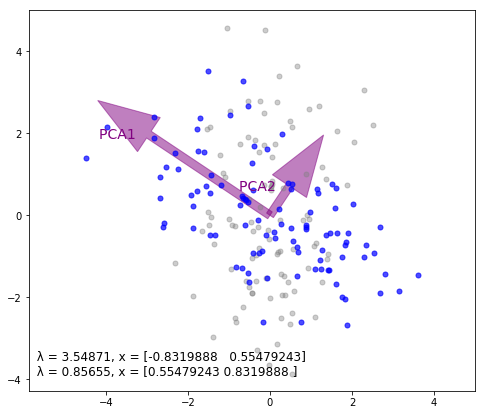

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(8,7))
ax.plot(X0[:,0], X0[:,1], color='gray', marker='.', linestyle='', markersize=10, alpha=0.4)
ax.plot(X1[:,0], X1[:,1], color='blue', marker='.', linestyle='', markersize=10, alpha=0.7)
ax.axis('equal')

txt = ''
i=0
for eigenvalue, eigenvector in zip(pca.explained_variance_, pca.components_):
    i += 1
    txt += f'  λ = {eigenvalue:.5f}, x = {eigenvector}\n'
    dx = eigenvalue * eigenvector[0]
    dy = eigenvalue * eigenvector[1]
    ax.arrow(0, 0, dx, dy, color='purple', width=0.2, head_width=1, alpha=0.5)
    ax.text(dx, dy, f'PCA{i}   ', color='purple', fontsize=14, ha='right', va='center')
ax.text(0, 0, txt, color='black', fontsize=12, transform=ax.transAxes);